# 线性回归

## 1.一元线性回归

### 1.1绘制散点图

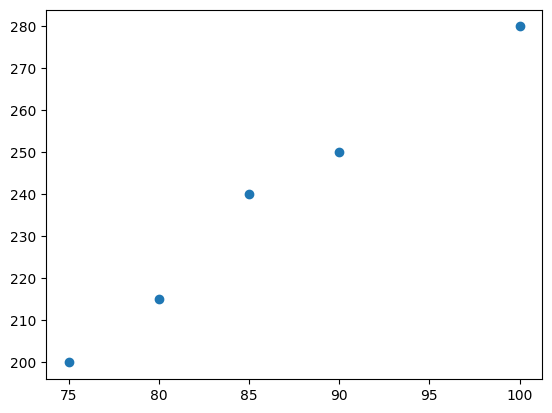

In [1]:
import matplotlib.pyplot as plt
import numpy as np
X = [[75], [80], [85], [90],[100]]
Y = [200, 215, 240, 250,280,]
plt.scatter(X, Y)
plt.show()

### 1.2使用sklearn库搭建模型

In [2]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,Y)  #拟合数组X、Y

LinearRegression()

* fit_intercept：是否计算该模型的截距b。如果设置为False，计算中将不使用截距。
* normalize：当fit_intercept设置为False时，将忽略该参数。若为真，则回归前对回归量X进行归一化处理。
* copy_X：一个布尔值。如果为True，会复制X，否则会覆盖X
* n_jobs：用于计算的作业数。

### 1.3模型预测

In [3]:
#预测一个数据
y = regr.predict([[200]])
print(y)

[603.64864865]


In [4]:
#预测多个数据
y = regr.predict([[15], [25], [45]])
print(y)

[  8.64864865  40.81081081 105.13513514]


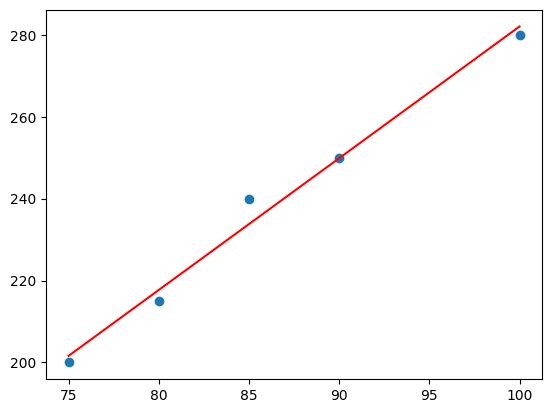

In [5]:
#模型可视化
plt.scatter(X, Y)
plt.plot(X, regr.predict(X),color = 'r')
plt.show()

### 1.4系数和截距

In [6]:
print('系数a=' + str(regr.coef_[0]))
print('截距b=' + str(regr.intercept_))

系数a=3.216216216216216
截距b=-39.59459459459458


方程为 y = 3.2x-39

## 2.案例 - 收入预测

通常来说，收入都会随着工作年限的增长而增长，搭建收入预测模型来探寻某行业工作年限对收入的影响。

In [7]:
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

In [8]:
import pandas as pd
df = pd.read_csv("./dataset/salary.csv")
df.head()

,work_date,salary
0,0.0,9058.25
1,0.1,11085.55
2,0.2,10467.10
3,0.3,9833.45
4,0.3,10559.25


In [9]:
# 此时的工龄为自变量，薪水为因变量，通过如下代码进行自变量、因变量选取
X = df[['work_date']]
Y = df['salary']

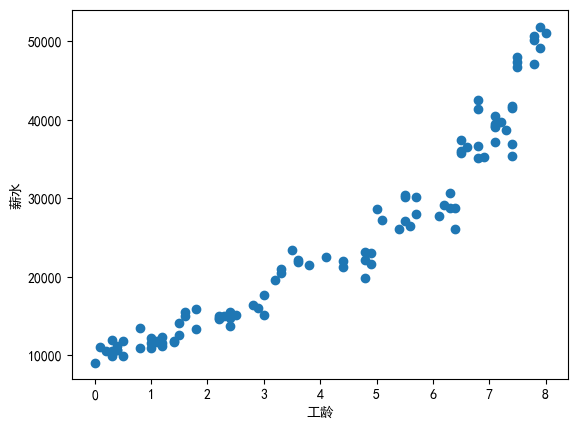

In [10]:
# 通过如下代码可以将此时的散点图绘制出来：
plt.scatter(X,Y)
plt.xlabel('工龄')
plt.ylabel('薪水')
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()  # 引入模型
regr.fit(X,Y)  # 训练模型

LinearRegression()

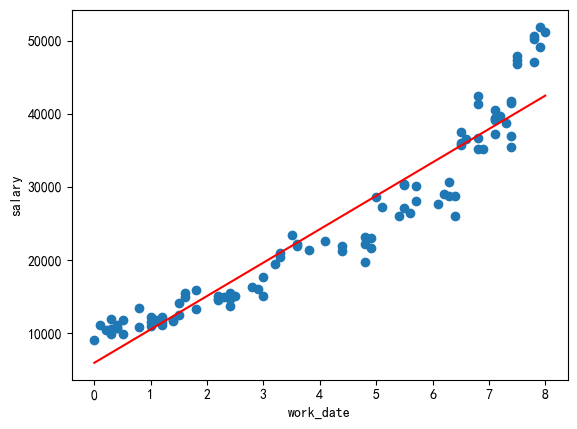

In [12]:
plt.scatter(X,Y)
plt.plot(X, regr.predict(X), color='r')  # color='red'设置为红色
plt.xlabel('work_date')
plt.ylabel('salary')
plt.show()

In [13]:
print('系数a=' + str(regr.coef_[0]))
print('截距b=' + str(regr.intercept_))

系数a=4563.114692166884
截距b=5960.762330352602


此时的一元线性回归曲线方程为：y = 4563*x - 5960

## 2.模型优化 - 一元多次线性回归

对于一元线性回归模型而言，其实它还有一个进阶版本，叫作一元多次线性回归模型，比较常见的有一元二次线性回归模型，其格式如下：

$$y = a*x^{2} + b*x + c$$

我们之所以还会研究一元多次线性回归模型，是因为有时真正契合的趋势线可能不是一条直线，而是一条曲线，比如下图根据一元二次线性回归模型形成的曲线更契合散点图背后的趋势。

In [14]:
# 通过如下代码生成数据：
from sklearn.preprocessing import PolynomialFeatures
df = PolynomialFeatures(degree = 2)  #最多添加几次幂
X_ = df.fit_transform(X)

In [15]:
print(X_[0:3])

[[1.   0.   0.  ]
 [1.   0.1  0.01]
 [1.   0.2  0.04]]


In [16]:
# 模型训练
regr = LinearRegression()
regr.fit(X_, Y)

LinearRegression()

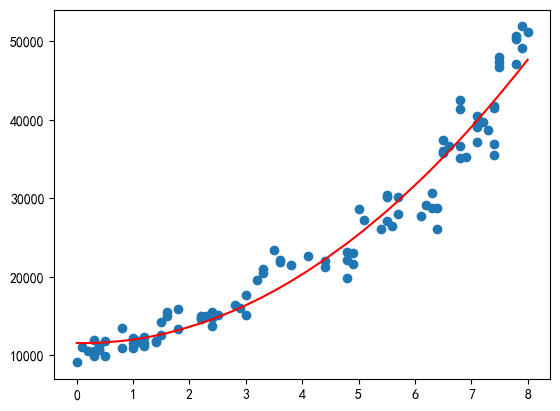

In [17]:
# 可视化
plt.scatter(X,Y)
plt.plot(X, regr.predict(X_), color='red')
plt.show()

In [18]:
# 打印系数和常数项
print(regr.coef_)  # 获取系数a, b 
print(regr.intercept_)  # 获取常数项c

[   0.         -137.75344181  581.37125889]
11538.023282918542


此时的系数项中为3个数，第一个0对应之前生成的X_常数项前面的系数，也对应之前说的X_的常数项不会产生影响；-137代表的X_一次项前面的系数，也即系数b；581代表的X_二次项前面的系数，也即系数a；而11538则代表常数项c，所以该一元二次线性回归方程为：

y = 581*x^2 - 137*x + 11538

# 模型评估

## 方法一、statsmodels库

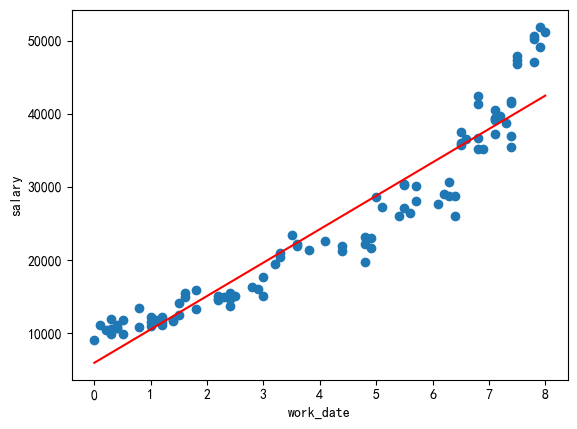

系数a=4563.114692166884
截距b=5960.762330352602


In [19]:
# 1.读取数据
import pandas as pd
df = pd.read_csv("./dataset/salary.csv")
X = df[['work_date']]
Y = df['salary']


# 2.模型训练
from sklearn.linear_model import LinearRegression
regr = LinearRegression()  # 引入模型
regr.fit(X,Y)  # 训练模型


# 3.模型可视化
plt.scatter(X,Y)
plt.plot(X, regr.predict(X), color='r')  # color='red'设置为红色
plt.xlabel('work_date')
plt.ylabel('salary')
plt.show()



# 4.构造方程
print('系数a=' + str(regr.coef_[0]))
print('截距b=' + str(regr.intercept_))


In [20]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2).fit()
est.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     934.4
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           6.58e-52
Time:                        13:37:43   Log-Likelihood:                -967.14
No. Observations:                 100   AIC:                             1938.
Df Residuals:                      98   BIC:                             1943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5960.7623    729.885      8.167      0.000    4512.329    7409.196
work_date   4563.1147    149.279     30.568      0.000    4266.876    4859.354
==============================================================================
Omnibus:                        1.892   Durbin-Watson:                   0.368
Prob(Omnibus):                  0.388   Jarque-Bera (JB):                1.519
Skew:                           0.298   Prob(JB):                        0.468
Kurtosis:                       3.093   Cond. No.                         9.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_ = poly_reg.fit_transform(X)

import statsmodels.api as sm
X2 = sm.add_constant(X_)  # 这里传入的是含有x^2的X_
est = sm.OLS(Y, X2).fit()
est.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1046.
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           2.26e-66
Time:                        13:37:43   Log-Likelihood:                -929.04
No. Observations:                 100   AIC:                             1864.
Df Residuals:                      97   BIC:                             1872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.154e+04    729.321     15.820      0.000    1.01e+04     1.3e+04
x1          -137.7534    458.166     -0.301      0.764   -1047.087     771.580
x2           581.3713     55.226     10.527      0.000     471.762     690.980
==============================================================================
Omnibus:                        3.863   Durbin-Watson:                   0.781
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                3.229
Skew:                          -0.343   Prob(JB):                        0.199
Kurtosis:                       3.551   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 方法二、sklearn库获取R-squared值

In [22]:
# 1.读取数据
import pandas as pd
df = pd.read_csv("./dataset/salary.csv")
X = df[['work_date']]
Y = df['salary']


# 2.模型训练
from sklearn.linear_model import LinearRegression
regr = LinearRegression()  # 引入模型
regr.fit(X,Y)  # 训练模型

LinearRegression()

In [23]:
from sklearn.metrics import r2_score
r2 = r2_score(Y, regr.predict(X))
print(r2)

0.9050742309885262


# 多元线性回归

## 案例 - 入学概率预测

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# 1.读取数据
df = pd.read_csv("./dataset/Admission_Predict.csv")
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB
None
       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min 

C:\Users\hechang\AppData\Local\Temp\ipykernel_20352\3822784942.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df['GRE Score'], kde=False)


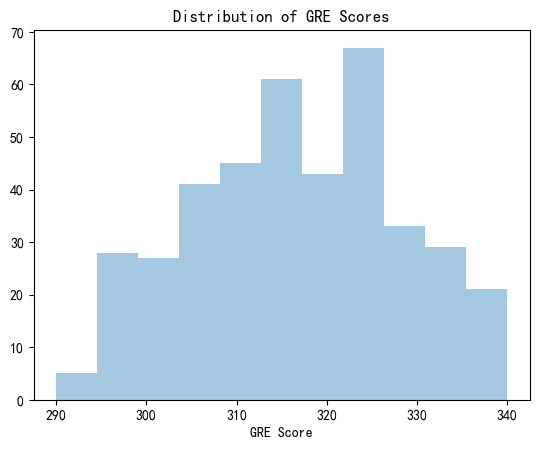

C:\Users\hechang\AppData\Local\Temp\ipykernel_20352\3822784942.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df['TOEFL Score'], kde=False)


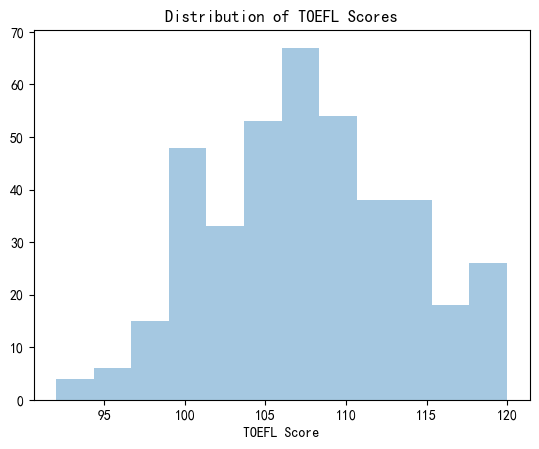

C:\Users\hechang\AppData\Local\Temp\ipykernel_20352\3822784942.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df['University Rating'], kde=False)


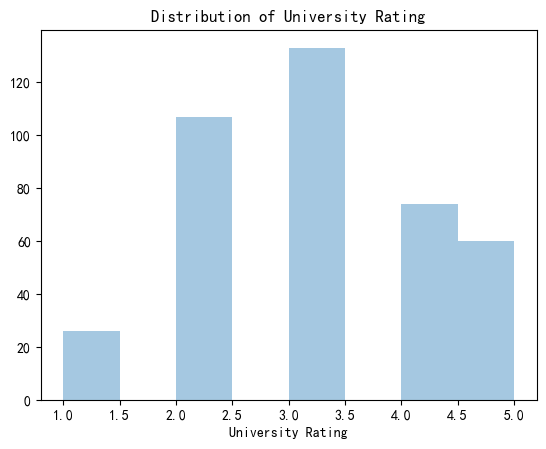

C:\Users\hechang\AppData\Local\Temp\ipykernel_20352\3822784942.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df['SOP'], kde=False)


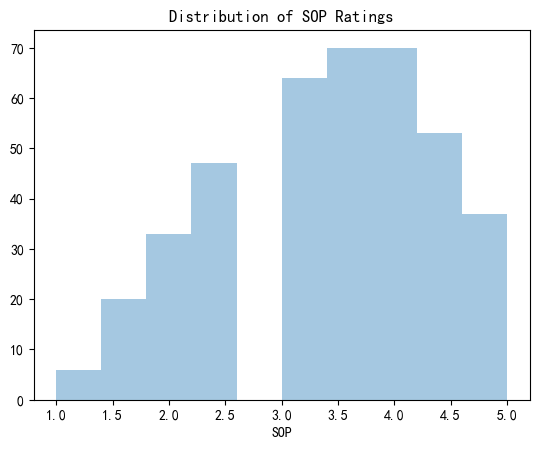

C:\Users\hechang\AppData\Local\Temp\ipykernel_20352\3822784942.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df['CGPA'], kde=False)


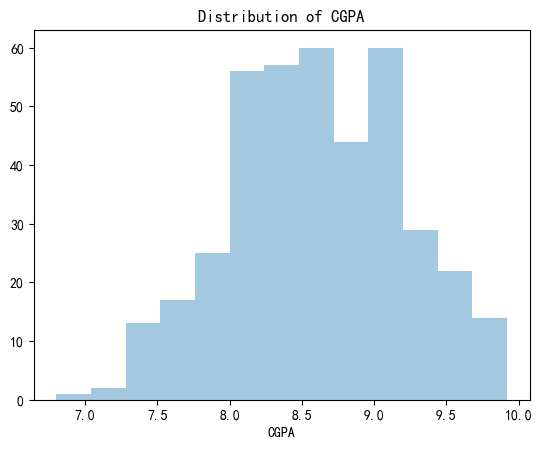

In [26]:
# 查看一下数据分布
import matplotlib.pyplot as plt
import seaborn as sns


fig = sns.distplot(df['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.distplot(df['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.distplot(df['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

fig = sns.distplot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

fig = sns.distplot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

plt.show()

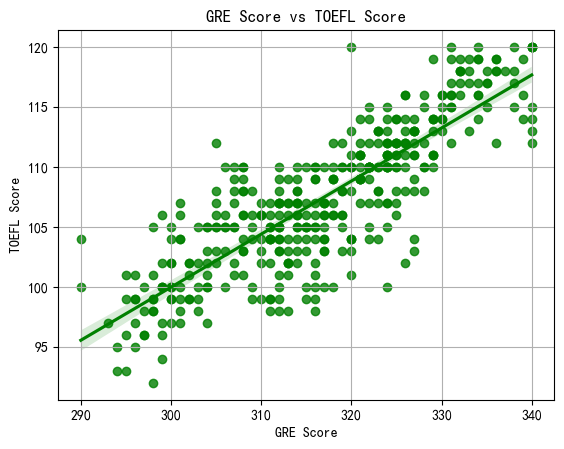

In [31]:
#查看两个因素直接的相关性
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df,color='green')
plt.grid()
plt.title("GRE Score vs TOEFL Score")
plt.show()

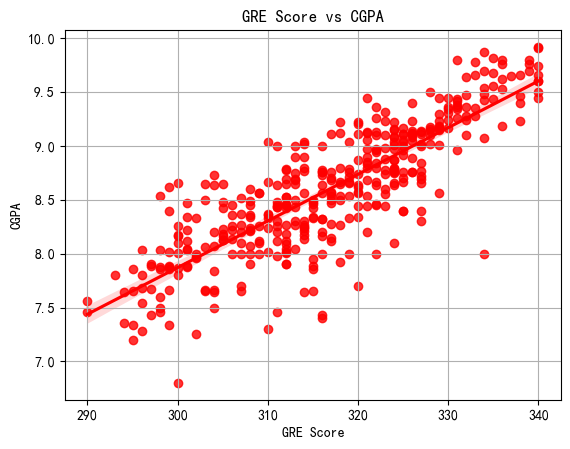

In [32]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df,color='red')
plt.grid()
plt.title("GRE Score vs CGPA")
plt.show()

In [33]:
# 正式开始
X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']

In [34]:

# 模型训练
from sklearn.linear_model import LinearRegression
regr = LinearRegression()  # 引入模型
regr.fit(X,y)  # 训练模型



LinearRegression()

In [35]:
# 方程构造
regr.coef_
print('各系数=' + str(regr.coef_))
print('常数项系数=' + str(regr.intercept_))

各系数=[1.59313401e-04 1.79901054e-03 3.68217418e-03 8.78497695e-03
 9.93694119e-05 2.15369726e-02 1.05298032e-01 2.43772863e-02]
常数项系数=-1.2936490159537362


其中这里通过regr.coef_获得是一个系数列表，分别对应不同特征变量前面的系数，所以此时的多元线性回归曲线方程为：

y = -1.25 + 0.0017x1 + 0.0029x2 + 0.0057x3 -0.0033x4 + 0.022*x5 + 0.119*x6 +0.0245*x7

In [36]:
# 模型评估
import statsmodels.api as sm  # 引入线性回归模型评估相关库
X2 = sm.add_constant(X)
est = sm.OLS(y, X2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     220.9
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          6.52e-140
Time:                        13:39:08   Log-Likelihood:                 553.63
No. Observations:                 400   AIC:                            -1089.
Df Residuals:                     391   BIC:                            -1053.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2936      0.120    -10.775      0.000      -1.530      -1.058
Serial No.            0.0002   2.77e-05      5.753      0.000       0.000       0.000
GRE Score             0.0018      0.001      3.129      0.002       0.001       0.003
TOEFL Score           0.0037      0.001      3.487      0.001       0.002       0.006
University Rating     0.0088      0.005      1.903      0.058      -0.000       0.018
SOP                9.937e-05      0.005      0.018      0.985      -0.010       0.011
LOR                   0.0215      0.005      4.041      0.000       0.011       0.032
CGPA                  0.1053      0.012      8.786      0.000       0.082       0.129
Research              0.0244      0.008      3.185      0.002       0.009       0.039
==============================================================================
Omnibus:                       65.071   Durbin-Watson:                   0.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.066
Skew:                          -0.955   Prob(JB):                     7.62e-25
Kurtosis:                       4.737   Cond. No.                     1.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
from sklearn.metrics import r2_score
r2 = r2_score(y, regr.predict(X))
print(r2)

0.8188106175785793
